# TESTE TÉCNICO BETALENT - DIEGO DA SILVA RIBEIRO

# **ETAPA 01 - ANÁLISE EXPLORATÓRIA E INSIGHTS**

- Tratamento e preparação dos dados
- Análise exploratória com estatísticas descritivas relevantes
- Visualizações informativas
- Identificação e documentação de 3-5 insights significativos sobre o negócio

In [ ]:
# SETUP - Importando as bibliotecas que serão usadas ao longo do case.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle

# Importei para ignorar futuros erros de warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importando o dataset (que foi baixado para o meu PC e renomeado de sample_superstore.csv) e fazendo sua leitura para reconhecimento das colunas.

dados = pd.read_csv('sample_superstore.csv', encoding='latin1')
dados.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Verificando as estatisticas do conjunto de dados.

dados.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Podemos ver que nenhuma informação está faltando no conjunto de dados.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Alterando as colunas Order Date e Ship Date para o formato datetime

dados['Order Date'] = pd.to_datetime(dados['Order Date'])
dados['Ship Date'] = pd.to_datetime(dados['Ship Date'])

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Podemos ver que não tem nenhuma coluna com valores faltantes.

dados.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Verificando o número de valores exclusivos em cada coluna.

dados.nunique()

,0
Row ID,9994
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531


In [ ]:
# Calculando a soma total de valores duplicados (não há dados duplicados).
# Dessa forma constatamos que não existem dados duplicados, nulos/faltantes no dataset.

dados.duplicated(keep = False).sum()

0

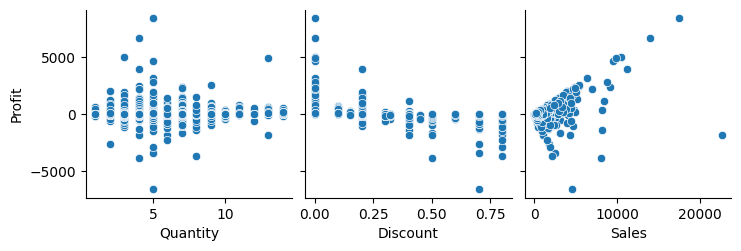

In [ ]:
# Vendo as correlações entre vas variaveis numéricas do dataset, em relação ao lucro.

sns.pairplot(dados, x_vars=['Quantity', 'Discount', 'Sales'], y_vars= 'Profit')

In [ ]:
# Vendo a correlacao entre as variaveis de formoa numérica.

cols = ['Sales', 'Quantity', 'Discount', 'Profit']
num_vars = dados[cols]

num_vars.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<Axes: >

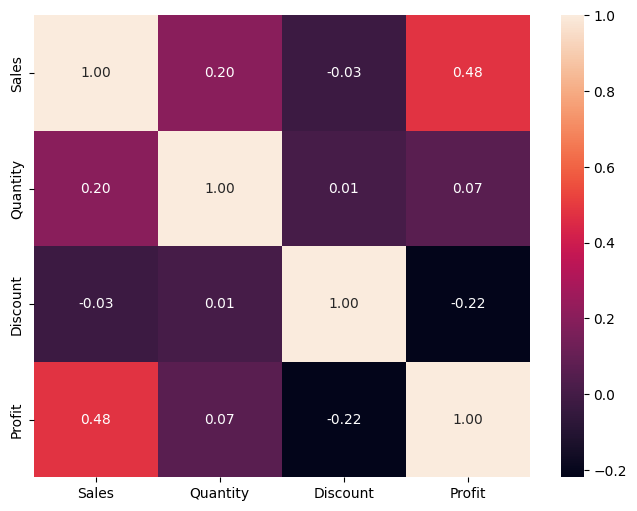

In [ ]:
 # Vendo a correlacao entre as variaveis forma gráfica.

plt.figure(figsize=(8, 6))
sns.heatmap(num_vars.corr(), annot=True, fmt=".2f")

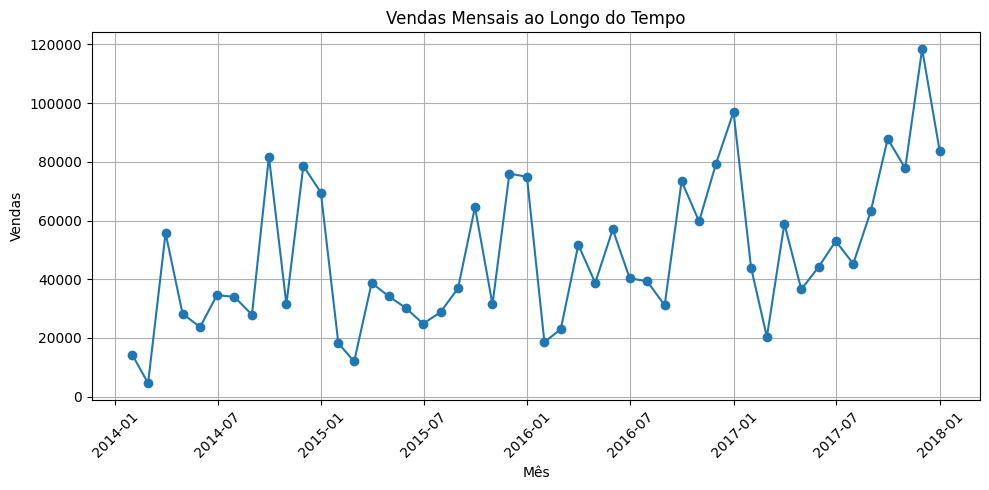

In [ ]:
# Grafico de vendas ao longo do tempo

# Group by por mes
venda_mensal= dados.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

plt.figure(figsize=(10, 5))
plt.plot(venda_mensal.index, venda_mensal.values, marker='o', linestyle='-')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   Year     Delay
0  2014  3.996989
1  2015  4.013796
2  2016  3.950522
3  2017  3.905495


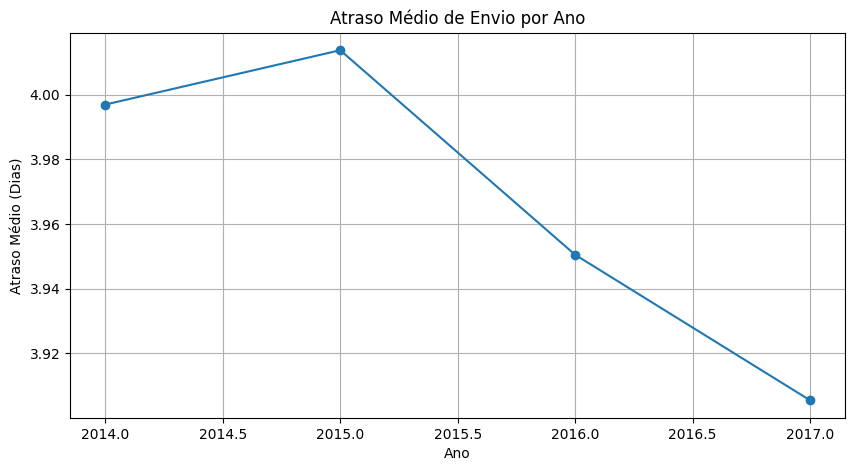

In [ ]:
# Grafico do atraso médio de Envio

# Calculando o atraso entre os dias da orem e do envio.
dados['Delay'] = (dados['Ship Date'] - dados['Order Date']).dt.days

# Extraindo o ano do 'Order Date'
dados['Year'] = dados['Order Date'].dt.year

# Group by 'Year' e calculando o atraso medio
media_atraso_por_ano = dados.groupby('Year')['Delay'].mean().reset_index()

print(media_atraso_por_ano)

plt.figure(figsize=(10, 5))
plt.plot(media_atraso_por_ano['Year'], media_atraso_por_ano['Delay'], marker='o', linestyle='-')
plt.title('Atraso Médio de Envio por Ano')
plt.xlabel('Ano')
plt.ylabel('Atraso Médio (Dias)')
plt.grid(True)
plt.show()

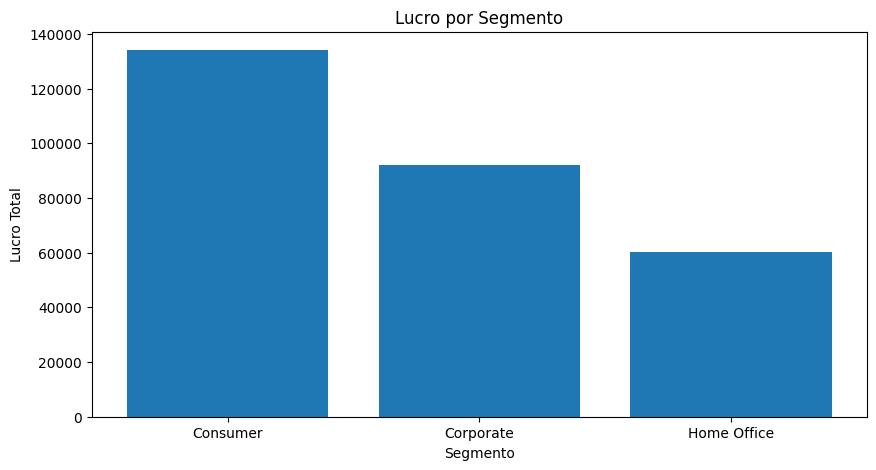

In [ ]:
# Grafico do lucro por segmento

# Group by por Segmento
lucro_por_segmento = dados.groupby('Segment')['Profit'].sum().reset_index()

# Plot the total profit by segment as a bar plot
plt.figure(figsize=(10, 5))
plt.bar(lucro_por_segmento['Segment'], lucro_por_segmento['Profit'])
plt.title('Lucro por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Lucro Total')
plt.show()

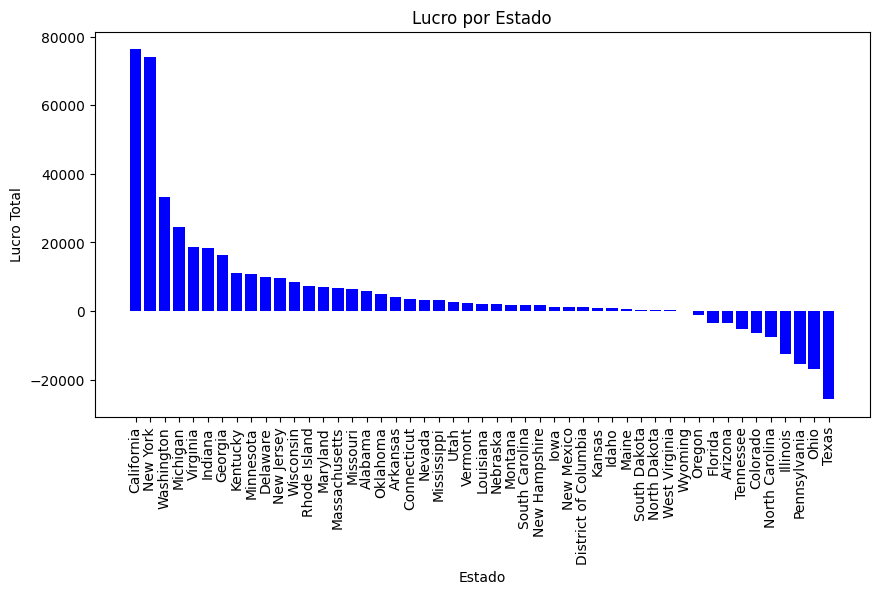

In [ ]:
# Gráfico de lucro por estado

#Group by por estado
lucro_por_estado = dados.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(lucro_por_estado['State'], lucro_por_estado['Profit'], color='b')
plt.title('Lucro por Estado')
plt.xlabel('Estado')
plt.ylabel('Lucro Total')
plt.xticks(rotation=90)  # Rotaciona os nomes dos estados para melhor leitura
plt.show()

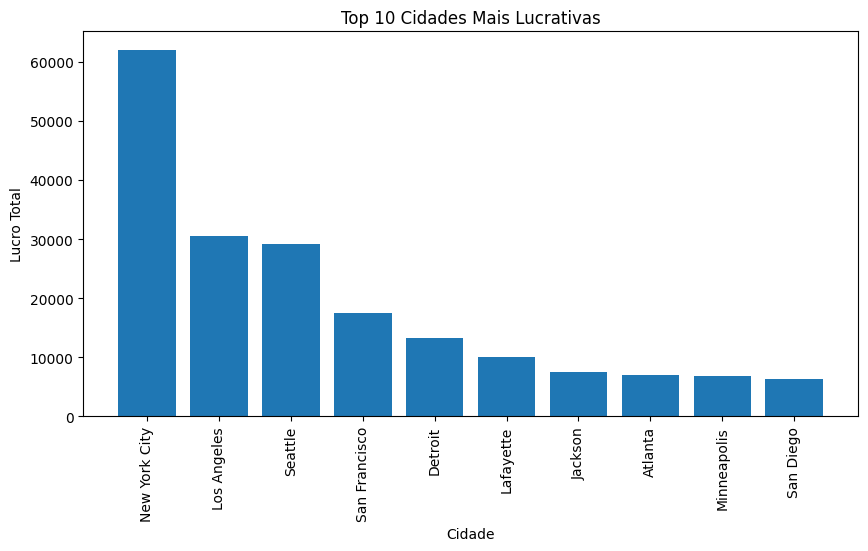

In [ ]:
# Gráfico de lucro por cidade (10 cidades mais lucrativas)

#Group by por cidade
lucro_por_cidade = dados.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(lucro_por_cidade['City'].head(10), lucro_por_cidade['Profit'].head(10))
plt.title('Top 10 Cidades Mais Lucrativas')
plt.xlabel('Cidade')
plt.ylabel('Lucro Total')
plt.xticks(rotation=90)  # Rotaciona os nomes dos estados para melhor leitura
plt.show()

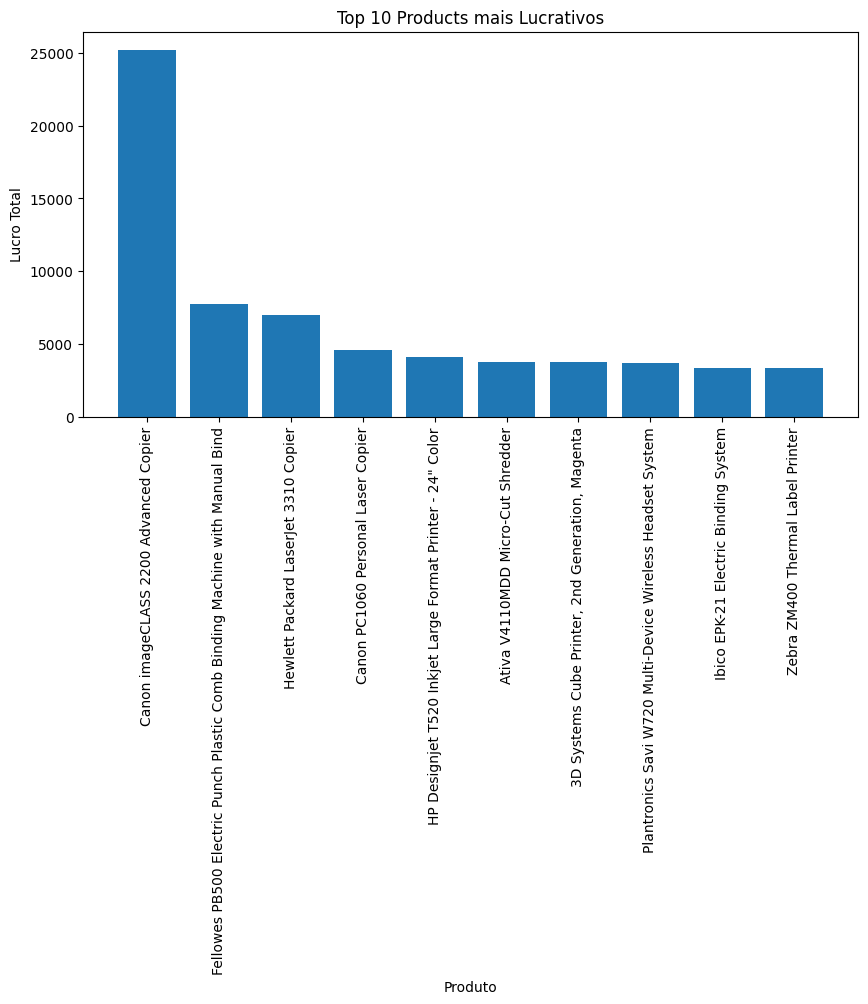

In [ ]:
# Gráfico top 10 produtos mais lucrativos

# Group by 'Product Name'
lucro_por_produto = dados.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(lucro_por_produto['Product Name'].head(10), lucro_por_produto['Profit'].head(10))
plt.title('Top 10 Products mais Lucrativos')
plt.xlabel('Produto')
plt.ylabel('Lucro Total')
plt.xticks(rotation=90)  # Rotaciona os nomes dos estados para melhor leitura
plt.show()

REGISTRO DOS INSIGHS OBTIGOS APÓS A ANÁLISE

Baseado na tabela e nos gráficos de correlações entre as variáveis e nos gráficos gerados durante a exploração, obtemos os seguintes insights sobre o negócio:

- As vendas têm crescido ano após ano nos últimos 4 anos.
- O tempo entre o pedido e a remessa diminuiu 0,1 dias nos últimos 4 anos.
- Nossa clientela mais lucrativa é:
   1. Consumer,
   2. Corporate Segmento,
   3. Home Office.
- Califórnia e Nova York são os estados mais lucrativos.
- Nova York e Los Angeles são as cidades mais lucrativas.
- Copiadoras e encadernadoras são as categorias de produtos mais lucrativas.
- O lucro aumenta conforme as vendas aumentam.
- O lucro aumenta conforme a quantidade aumenta.
- O lucro diminui conforme os descontos aumentam.

# **ETAPA 02 - MACHINE LEARNING APLICADO**

- Desenvolvimento de um modelo preditivo relevante para previsão de vendas
- Avaliação e interpretação do modelo escolhido

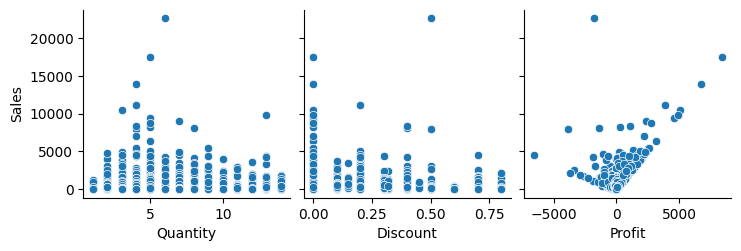

In [ ]:
# Vendo as correlações entre vas variaveis numéricas do dataset, em relação a variavel 'Sales'(que será que iremos prever com o modelo)
# Podemos ver que as relações entre vas variaveis numericas não são muito lineares, dessa forma nao irei usar regressao linear e sim
# uma árvore de regressão com boosting para otimizar o resultado.

sns.pairplot(dados, x_vars=['Quantity', 'Discount', 'Profit'], y_vars= 'Sales')

<Axes: >

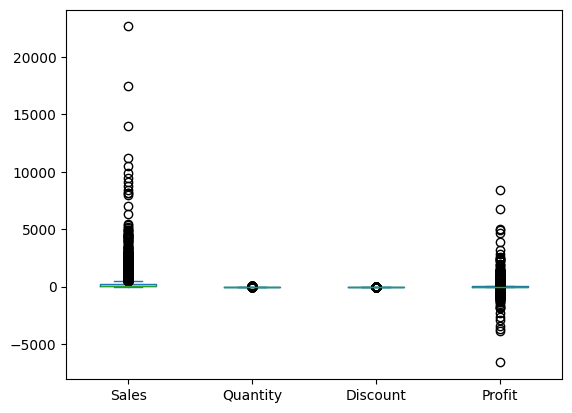

In [ ]:
# Boxplot dos dados para visualizacao dos outliers nas variaveis numéricas.

dados[['Sales','Quantity', 'Discount', 'Profit']].plot.box()

In [ ]:
# Aplicando o metodo do intervalo interquartil (IQR) para remoção dos outliers.

numeric_cols = dados.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = dados[col].quantile(0.25)
    Q3 = dados[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    dados = dados[(dados[col] >= limite_inferior) & (dados[col] <= limite_superior)]

<Axes: >

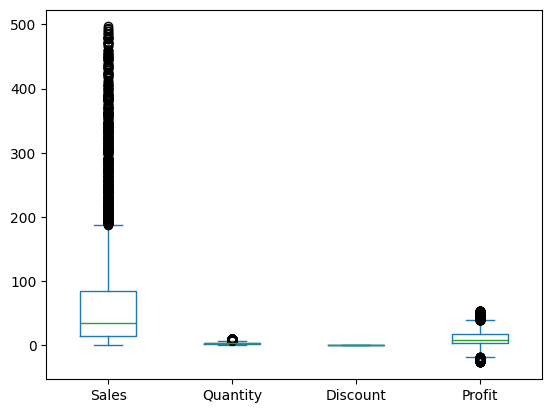

In [ ]:
# Vendo os outliers após aplicação do método IQR.

dados[['Sales','Quantity', 'Discount', 'Profit']].plot.box()

In [ ]:
# Selecionando as variáveis independentes (features) e a variável dependente (target)

x = dados.drop(columns=['Sales', 'Row ID', 'Order ID','Order Date', 'Ship Date' , 'Country', 'Postal Code','Ship Mode', 'Product ID','Customer ID'], axis=1)  # Excluindo colunas especificadas
y = dados['Sales']

In [ ]:
# Listando  as colunas numéricas e categóricas

numeric_features = ['Quantity', 'Discount', 'Profit']
categorical_features = ['Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category',
                        'Customer Name', 'Product Name']


In [ ]:
# Criando transformações para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # esses parametros do Ordinal Encoder substitui novas categorias por um valor específico (-1)
])

# Combinando transformações usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Criando o pipeline completo com pré-processamento e modelo de regressão linear
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

In [ ]:
# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinando o modelo
pipeline.fit(x_train, y_train)

# Fazendo previsões
y_pred = pipeline.predict(x_test)

In [ ]:
# Verificando as metricas para o modelo

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Mean Squared Error: 2456.233294209711
R² Score: 0.6566958074145888


In [ ]:
# Usando o método GridSearch para otimizar o modelo e definindo os parâmetros
# Parâmetros para otimização

param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3],
    'regressor__subsample': [0.8, 1.0]
}

In [ ]:
# Criando o GridSearch

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)

In [ ]:
# Treinando o GridSearch

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Quantity',
                                                                          'Discount',
                                                                          'Profit']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Segment',
                                                                          'City',
                                                                          'State',
                                                                          'Region',
                                                                          'Category',
                                                                          'Sub-Category',
                                                                          'Customer '
                                                                          'Name',
                                                                          'Product '
                                                                          'Name'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [3, 5],
                         'regressor__min_samples_leaf': [1, 3],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 300],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='r2')

In [ ]:
 # Resultados da busca

print("Melhores Hiperparâmetros:", grid_search.best_params_)

Melhores Hiperparâmetros: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300, 'regressor__subsample': 1.0}


In [ ]:
# Criando o pipeline com os melhores hiperparâmetros

best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.1,
        max_depth=5,
        min_samples_leaf=3,
        min_samples_split=2,
        n_estimators=300,
        subsample=1.0,
        random_state=42
    ))
])

In [ ]:
# Treinando o modelo final com os melhores hiperparâmetros

best_pipeline.fit(x_train, y_train)

# Fazendo previsões

y_pred = best_pipeline.predict(x_test)

In [ ]:
# Verificando as metricas para o modelode TUNADO

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 1553.9814750201704
R² Score: 0.7828022456856506


In [ ]:
# Salvando o modelo treinado (arquivo binário)

with open('modelo_gradient_boosting.pkl', 'wb') as modelo_file:
    pickle.dump(best_pipeline, modelo_file)

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


Avaliação da Performance do Modelo e Otimização dos Hiperparâmetros

Após a realização da tunagem dos hiperparâmetros, observou-se uma melhora substancial no desempenho do modelo, evidenciando uma otimização eficaz dos parâmetros. O valor final de R² superior a 0.7 indica que o modelo apresenta um desempenho satisfatório e é adequado para a tarefa proposta.

No entanto, vale ressaltar que a busca pela melhor combinação de parâmetros foi realizada com um número reduzido de opções e utilizando validação cruzada com 3 folds (cv=3), com o objetivo de reduzir o tempo de execução da busca. Embora essa estratégia tenha sido eficaz para obter uma solução rapidamente, há espaço para otimização adicional. Ao aumentar o número de parâmetros considerados e utilizar uma validação cruzada com 5 folds (cv=5), é possível que o modelo seja ainda mais refinado, potencializando sua performance.

# **ETAPA 03 - INTEGRAÇÃO COM IA GENERATIVA**

- Integração das estatísticas ao contexto de um LLM para gerar insights em linguagem natural
- Documentação da abordagem e resultados obtidos

In [ ]:
# Instalando a bibliotecas necessarias para usar o meu modelo de LLM gratuito rodando na minha máquina, irei usar modelo EleutherAI/gpt-neo-1.3B, por ser menor e conseguir rodar ele no collab.

!pip install -q transformers torch

In [ ]:
from transformers import pipeline

# Definindo a função para gerar insights

def gerando_insights(y_pred, y_test):
    # Garantindo que y_pred e y_test sejam arrays NumPy
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)

    # Calculando o erro médio absoluto (MAE)
    erro_medio_absoluto = np.mean(np.abs(y_pred - y_test))

    # Criando um prompt
    prompt = (
        f"O modelo de regressão usando Gradient Boosting Regressor tem um erro médio absoluto (MAE) de {erro_medio_absoluto:.2f}.\n"
        "Dado esse valor de erro, gostaria de sugestões específicas para melhorar o modelo. "
    )

    # Exibir o prompt antes de gerar insights
    print("Prompt utilizado:\n" + prompt)

    # Carregando o modelo GPT-Neo para geração de texto
    gerador = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

    # Ajustando parâmetros para gerar uma resposta
    resposta = gerador(
        prompt,
        max_length=500,  # Limite de comprimento
        do_sample=True,
        temperature=0.7,  # Temperatura ajustada
        top_p=0.85,  # Nucleus sampling com um limite mais baixo
        top_k=50,  # Limitação de k para aumentar a coesão
        pad_token_id=50256,
        truncation=True,
        no_repeat_ngram_size=3,  # Penaliza repetições mais longas
        repetition_penalty=2.0,  # Penaliza fortemente repetições
        early_stopping=True,  # Para encerrar a geração rapidamente se uma boa resposta for dada
    )

    # Removendo o prompt da resposta gerada e limpando espaços extras
    texto_gerado = resposta[0]['generated_text'].replace(prompt, "").strip()

    # Verificando e removendo repetições exatas (duplicatas) manualmente
    texto_gerado = "\n".join(sorted(set(texto_gerado.split("\n")), key=texto_gerado.split("\n").index))

    # Verificando se a resposta está vazia
    if not texto_gerado:
        texto_gerado = ("A resposta gerada ainda não está relevante. "
                        "Tente ajustar os parâmetros do modelo ou forneça mais contexto para um retorno mais assertivo.")

    # Exibir insights na tela
    print("\nInsights gerados pelo modelo:\n" + texto_gerado)

    # Retornar os insights
    return texto_gerado

In [ ]:
# Chamando a função com os valores de y_pred e y_test, para termos a reposta do LLM

insights = gerando_insights(y_pred, y_test)

Prompt utilizado:
O modelo de regressão usando Gradient Boosting Regressor tem um erro médio absoluto (MAE) de 20.58.
Dado esse valor de erro, gostaria de sugestões específicas para melhorar o modelo. 


Device set to use cpu



Insights gerados pelo modelo:
A:

Você precisa alterar a quantidade de classes que você quer usar para a regra.   
Se você quiser cada uma das variáveis de entrada, basta colocar no seu código: 
x = tf.Variable(tf.random_normal([10,1], mean=0.0, stddev=0), name="X")
y = tf2.VariableList([[1.0] * 10 + 0.5, [0.5] * 1 + 0])
Se estiver usando a função de GradientBoosting, bastante pouco importa isso:
model = tfRegressor(X, y, n_estimators=100, learning_rate=0., max_depth=3,
   epsilon=1e-06, nrounds=10000, max_iterations=5000, min_samples_split=20,
min_sigma=0, minibatch_size=50, alpha=0.)
Para fazer isso, você precizará usar a classe tfRegressionSummaryWriter.  Para isto, bastamos trocar a clase por algumas duas:
writer = tfregressionsummarywriters.TFRegressionModelSummaryWriter(model,
train_dir='/home/michael/TRAIN/', eval_dir="/home/phillips/TEST/")
Em outras palavras, bastaremos usar o writer para escrever os dados da modelagem.


Geração de Insights com um LLM Open-Source

A fim de obter insights mais detalhados sobre a qualidade do modelo, implementamos uma abordagem baseada em Modelos de Linguagem de Grande Escala (LLMs - Large Language Models). Utilizamos o modelo EleutherAI/gpt-neo-1.3B, um LLM open-source, para interpretar os resultados do modelo de regressão e sugerir possíveis melhorias.

Considerações Finais
Para este projeto, optamos por um modelo simples e leve, o EleutherAI/gpt-neo-1.3B, que pode ser facilmente executado no Google Colab. A escolha desse modelo foi estratégica, considerando sua acessibilidade e a necessidade de rodar em um ambiente de baixo custo computacional.
No entanto, é importante destacar que, devido à simplicidade e limitações do EleutherAI/gpt-neo-1.3B, os insights gerados não são tão refinados ou profundos quanto aqueles que seriam produzidos por modelos mais robustos. Caso haja a necessidade de respostas mais precisas, detalhadas e de maior relevância, a recomendação é utilizar uma LLM mais poderosa, como o GPT-4, que pode oferecer uma análise mais completa e sugestões mais eficazes para a melhoria do modelo de previsão.

PROXIMOS PASSOS PARA O PROJETO:

Após análise, aqui estão algumas perguntas que vieram à mente depois dos insights obtidoscom o dataset:

- Como podemos diminuir ainda mais os tempos de envio dos produtos ?
- Como podemos maximizar os lucros em nossos estados e cidades mais e menos lucrativos?
- Por que encadernadores e copiadoras são nossas categorias de produtos mais populares?
- O que deve ser feito sobre produtos não lucrativos?


Em relação ao modelo de machine learning desenvolvido, foi elaborado um modelo de regressão linear, usando a tecnica de esemble para o GradientBoostRegressor, o qual foi otimizado para melhoria dos parâmetros e performance.

Os próximos passos seriam encapsular ele, usando a biblioteca pickle, e depois disponibilizá-lo para consumo através de uma API (FAST API ou site usando a biblioteca STREAMLIT) ou gerar um conteiner no docker para servi-lo em alguma aplicação.

Podemos também usar a plataforma MLflow para gerenciar o ciclo de vida (MLOps), aonde teremos como realizar a manutenção, o monitoramento e o versionamento do modelo.